In [80]:
# Da qui si può selezionare la lingua per cui fare l'analisi
# lingue selezionabili: portoghese, spagnolo, tedesco, italiano, francese, inglese
lingua_selezionata = 'spagnolo'

In [81]:
'''Blocco di codice per funzione di utilità'''
# funzione per trovare l'elemento più comune in una lista
from collections import Counter
def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)

# Rete dei retweet

Graph has 2482 nodes and 1176 edges
Graph has 1306 connected components
1594326053337571330
Node with most edges:  1594326053337571330
Number of nodes of the biggest connected component:  27


<Figure size 640x480 with 0 Axes>

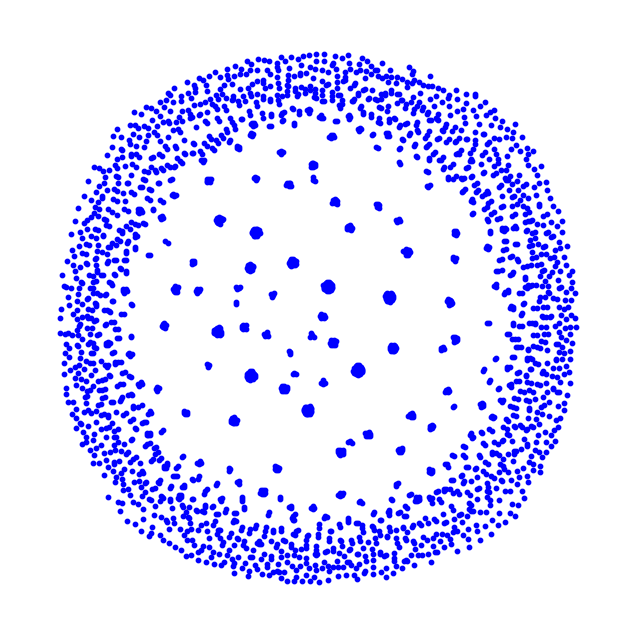

In [82]:
'''Componenti connesse dei retweet'''
import json
import networkx as nx
import matplotlib.pyplot as plt
import os

# Carica i dati dei tweet filtrati per la lingua selezionata
with open(lingua_selezionata + '.json', 'r') as f:
    tweets_data = json.load(f)
    
# Crea un grafo vuoto
G = nx.Graph()

lista = []
# Itera su tutti i tweet nel file
for tweet_data in tweets_data:
    
    # Aggiungi un nodo per l'utente che ha twittato e un nodo per l'utente del retweet
    G.add_node(tweet_data['id'])
    G.add_node(tweet_data['retweet_parent_id'])
    
    # i tweet che non sono retweet hanno retweet_parent_id = -1
    if tweet_data['retweet_parent_id'] != -1:
        G.add_edge(tweet_data['id'],tweet_data['retweet_parent_id'] )
        lista.append(tweet_data['retweet_parent_id'])
         
print("Graph has {} nodes and {} edges" .format(G.number_of_nodes(), G.number_of_edges()))
print("Graph has {} connected components" .format(nx.number_connected_components(G)))

# trovo il nodo più comune in due modi diversi
print(most_common(lista))  
node_with_most_edges = max(G.nodes(), key=G.degree)
print("Node with most edges: ", node_with_most_edges)
# numero di nodi della componente connessa più grande
print("Number of nodes of the biggest connected component: ", len(max(nx.connected_components(G), key=len)))

#impostazioni grafiche del grafo
fig= plt.gcf()
fig.set_facecolor("w")
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
plt.axis('off')

# disegno i nodi e gli archi
nx.draw_networkx_nodes(G, pos, node_color="blue", node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# crea una cartella per la lingua selezionata se non esiste
if not os.path.exists("immagini"):
    os.makedirs("immagini")
if not os.path.exists("immagini/" + lingua_selezionata):
    os.makedirs("immagini/" + lingua_selezionata)

#salva il grafico in un file
plt.savefig("immagini/" + lingua_selezionata + "/" + lingua_selezionata + "_retweet_network"+".png", format="PNG")

plt.show()
# chiude il file
f.close()

# Rete dei retweet più grande

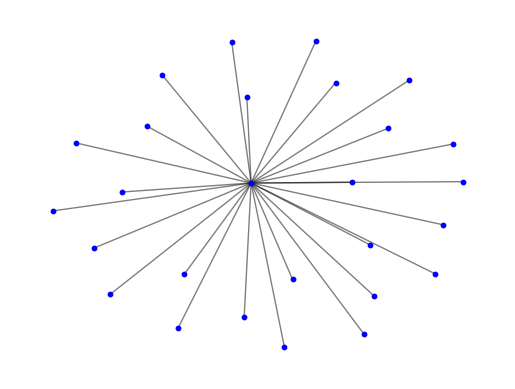

In [83]:
# prendo la componente connessa più grande del grafo
largest_network = max(nx.connected_components(G), key=len)

# disegno solo la componente connessa più grande senza gli altri nodi e archi
plt.axis('off')
nx.draw_networkx_nodes(G, pos, nodelist=largest_network, node_color="blue", node_size=10)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(largest_network), alpha=0.5)

#salva il grafico in un file
plt.savefig("immagini/" + lingua_selezionata + "/" + lingua_selezionata + "_retweet_max_network"+".png", format="PNG")

# Rete delle user mentions

Graph has 2775 nodes and 2085 edges
Graph has 798 connected components
715476691460558848
Node with most edges:  715476691460558848
Number of nodes of the biggest connected component:  352


<Figure size 640x480 with 0 Axes>

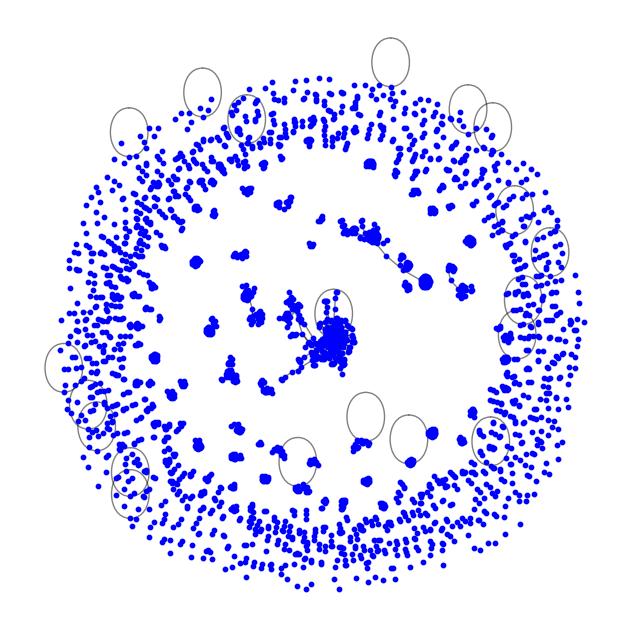

In [84]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Carica i dati dei tweet filtrati per la lingua selezionata
with open(lingua_selezionata + '.json', 'r') as f:
    tweets_data = json.load(f)
    
# Crea un grafo vuoto
G = nx.Graph()

lista = []
# Itera su tutti i tweet nel file
for tweet_data in tweets_data:
    
    # eliminiamo il tweet dell'utente di id 987198284 in quanto è un dato non conforme alla domanda di ricerca per questa sezione
    # in quanto questo utente ha menzionato più persone mentre a noi interessava la persona/pagina più menzionata
    if tweet_data['user_id'] != 987198284:
        # Aggiungi un nodo per l'utente che ha twittato
        G.add_node(tweet_data['user_id'])
        # ogni tweet ha una lista di menzioni, può essere vuota
        mentions = tweet_data['user_mentions']
        for mention in mentions:
            if mention['id'] != 987198284:
                G.add_node(mention['id'])
                G.add_edge(tweet_data['user_id'], mention['id'])
                lista.append(mention['id'])
    
print("Graph has {} nodes and {} edges" .format(G.number_of_nodes(), G.number_of_edges()))
print("Graph has {} connected components" .format(nx.number_connected_components(G)))

# trovo il nodo più comune in due modi diversi
print(most_common(lista))
node_with_most_edges = max(G.nodes(), key=G.degree)
print("Node with most edges: ", node_with_most_edges)
# numero di nodi della componente connessa più grande
print("Number of nodes of the biggest connected component: ", len(max(nx.connected_components(G), key=len)))

fig= plt.gcf()
fig.set_facecolor("w")
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
plt.axis('off')

nx.draw_networkx_nodes(G, pos, node_color="blue", node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.5)

#salva il grafico in un file
plt.savefig("immagini/" + lingua_selezionata + "/user_mentions_"+lingua_selezionata+".png", format="PNG")

plt.show()
f.close()

# Rete delle user mentions più grande

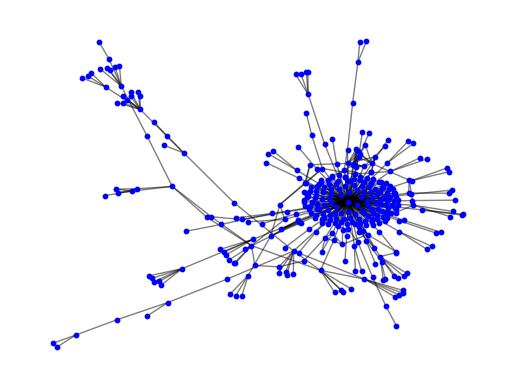

In [85]:
# prendo la componente connessa più grande del grafo
largest_network = max(nx.connected_components(G), key=len)

# disegno solo la componente connessa più grande senza gli altri nodi e archi
plt.axis('off')
nx.draw_networkx_nodes(G, pos, nodelist=largest_network, node_color="blue", node_size=10)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(largest_network), alpha=0.5)

#salva il grafico in un file
plt.savefig("immagini/" + lingua_selezionata + "/user_mentions_max_"+lingua_selezionata+".png", format="PNG")

# Hashtag più usati

In [86]:
import json

# funzione per trovare i 5 elementi più comuni in una lista
from collections import Counter
def most_common(lst, n):
    data = Counter(lst)
    return data.most_common(n)

# Carica i dati dei tweet filtrati per la lingua selezionata
with open(lingua_selezionata + '.json', 'r') as f:
    tweets_data = json.load(f)

# ciclo tra tutti i tweet del dataset per la lingua selezionata
lista_hashtag = []
for tweet_data in tweets_data:
    
    # per ogni tweet prendo la lista di hashtag
    hashtags = tweet_data['hashtags']
    for hashtag in hashtags:
        lista_hashtag.append(hashtag['text'].lower())
        
# Calcolo delle 5 hashtag più usati
print("Le 5 hashtag più usati per la lingua {} sono: {}" .format(lingua_selezionata, most_common(lista_hashtag, 5)))

f.close()

Le 5 hashtag più usati per la lingua spagnolo sono: [('rusia', 19), ('ahora', 18), ('ucrania', 17), ('ultimahora', 14), ('apuntesoperador', 13)]


# Word frequency

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('ucrania', 255), ('rusia', 249), ('armas', 236), ('operadornuclear', 216), ('guerra', 196), ('si', 158), ('energía', 142), ('central', 139), ('mundo', 123), ('eeuu', 107), ('corea', 97), ('chernobyl', 90), ('norte', 71), ('ataque', 69), ('ahora', 68), ('uso', 63), ('jimin', 63), ('europa', 62), ('años', 61), ('china', 59)]


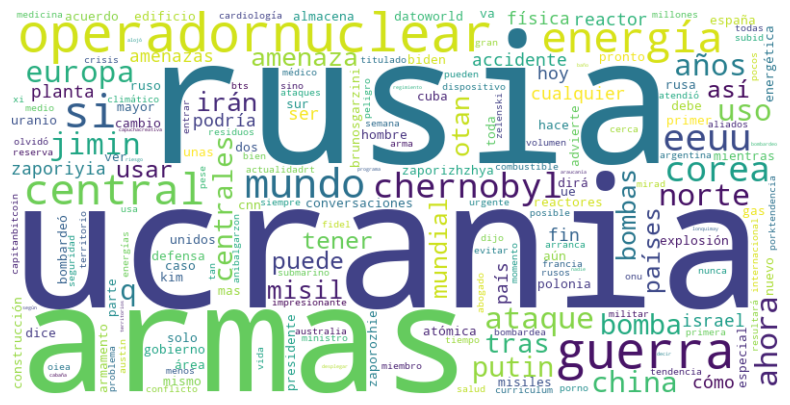

In [87]:
'''WORD FREQUENCY PER LINGUA'''
import json
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# seleziona la lingua in base a quella selezionata ad inizio file
# per ogni lingua ho selezionato le stopwords che non voglio considerare non presenti nella lista dalla libreria nltk
match lingua_selezionata:
    case 'portoghese':
        selected_language = 'portuguese'
        stopwords = ['nuclear','https','http','co','amp','rt']
    case 'spagnolo':
        selected_language = 'spanish'
        stopwords = ['nucleares','nuclear','https','http','co','amp','rt']
    case 'tedesco':
        selected_language = 'german'
        stopwords = ['nuklearia','https','http','co','amp','rt']
    case 'italiano':
        selected_language = 'italian'
        stopwords = ['nucleare','https','http','co','amp','rt','poi','fa','della','delle','dell','essere','può','senza','solo','anche','così','quindi','dopo','fatto','fino','sì','cosa','parte','no','due','già','ora','nessuna','invece','tre','quale','quando','prima','tutto','stati','stata']
    case 'francese':
        selected_language = 'french'
        stopwords = ['ça','a','nucléaire','nucléaires','https','http','co','amp','rt']
    case 'inglese':
        selected_language = 'english'
        # stopwords che abbiamo deciso di non considerare nono presenti nella lista dalla libreria nltk
        stopwords = ['https','http','co','it','would','the','amp','use','go','one','name','get','rt','nuclear']

nltk.download('punkt')  # Scarica i dati necessari per il tokenization
nltk.download('stopwords')

with open(lingua_selezionata + '.json', 'r') as f:
    data = json.load(f)

# Creazione di un unico testo da tutti i tweet
testo = ""
for item in data:
    testo += " " + item['text'].lower()
    
# Tokenization del testo
parole = word_tokenize(testo)
# rimuovi i simboli di punteggiatura o non parole e le stopwords
parole = [parola for parola in parole if parola.isalpha()]
parole = [parola for parola in parole if parola not in nltk.corpus.stopwords.words(selected_language)]
parole = [parola for parola in parole if parola not in stopwords]

# Calcolo della word frequency
frequenza_parole = FreqDist(parole)
# stampa delle 20 parole più frequenti
print(frequenza_parole.most_common(20))

# Creazione di un'immagine di WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequenza_parole)

# Visualizzazione della WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#salva l'immagine in un file nella sottocartella immagini
wordcloud.to_file("immagini/" + lingua_selezionata + "/wordcloud_" + lingua_selezionata + ".png")

f.close()